In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (20,10)

crime = pd.read_csv("crime.csv", index_col=False, sep=',', encoding='windows-1252')
crime[0:20]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


<AxesSubplot:>

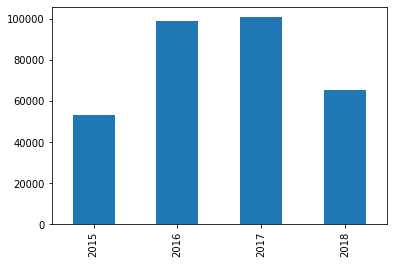

In [34]:
# 1. Wie hat sich die Gesamtanzahl der Straftaten im Laufe der Jahre entwickelt?
crime["YEAR"].value_counts().sort_index().plot.bar()

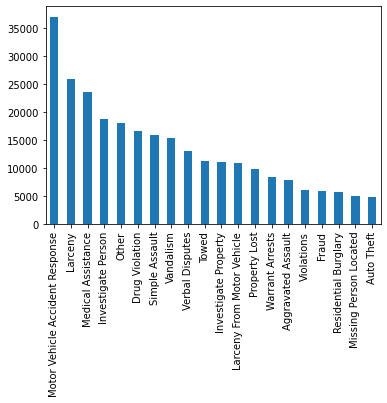

In [35]:
# 1.1 Welche Straftaten sind am häufigsten?
most_frequent_crime = crime['OFFENSE_CODE_GROUP'].value_counts()[:20].sort_values(ascending=False)
most_frequent_crime.plot(kind='bar')
plt.show()

<AxesSubplot:>

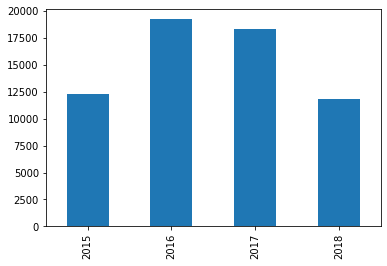

In [36]:
# 1.2 Wie hat sich die Zahl der schweren Straftaten im Laufe der Jahre entwickelt?
part_one_crime = crime.loc[crime.UCR_PART == "Part One"]
part_one_crime.YEAR.value_counts().sort_index().plot.bar()

<AxesSubplot:xlabel='YEAR'>

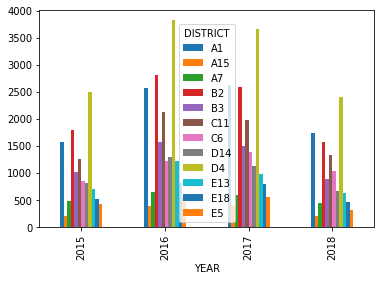

In [59]:
# 2.1 In welchen Stadtgebieten werden die meisten schweren Straftaten ('Part One') begangen?
part_one_crime.groupby('DISTRICT').YEAR.value_counts().unstack(0).plot.bar()


<AxesSubplot:>

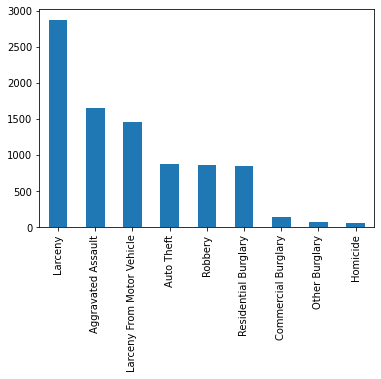

In [38]:
# 2.2 Welche Arten von schweren Straftaten ('Part One') treten in dem Stadtgebiet 'B2' am häufigsten auf?
part_one_crime_in_B2 = part_one_crime.loc[crime.DISTRICT == 'B2']
part_one_crime_in_B2['OFFENSE_CODE_GROUP'].value_counts().plot.bar()

<AxesSubplot:>

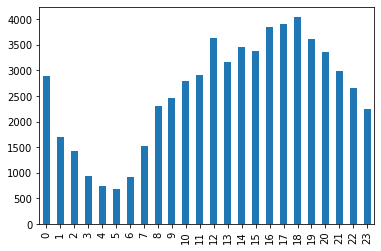

In [39]:
# 3 a) Existieren (a) Uhrzeiten, an denen mehr schwere Verbrechen ('Part One') stattfinden?
part_one_crime['HOUR'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

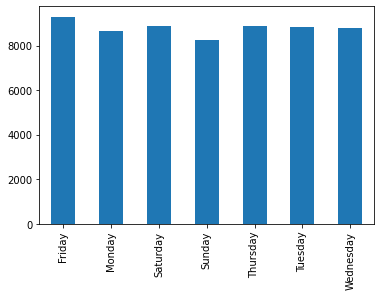

In [40]:
# 3 b) Existieren Tage, an denen mehr schwere Verbrechen ('Part One') stattfinden?
part_one_crime['DAY_OF_WEEK'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

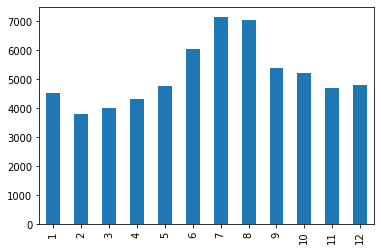

In [41]:
# 3 c) Existieren Monate, an denen mehr schwere Verbrechen ('Part One') stattfinden?
part_one_crime['MONTH'].value_counts().sort_index().plot.bar()

In [15]:
# 3.2 Finden Straftaten eher nachts oder tagsüber statt?
# Straftaten finden eher tagsüber statt, siehe 3 a).

# 3.3 Wann werden somit die meisten Polizisten benötigt?
# freitags zwischen 16 und 18 Uhr Im Juli und August

In [16]:
# 4. Welche leichten Straftaten ('Part Tree') benötigen (vermutlich) Verkehrspolizisten?
road_crime_string = 'AUTO|PEDESTRIAN|BICYCLE|ACCIDENT|VEHICLE|LICENSE|MOTORCYCLE|SCOOTER|INFLUENCE ALCOHOL'
road_part_three_crime = crime.loc[(crime['UCR_PART'] == 'Part Three') & (crime['OFFENSE_DESCRIPTION'].str.contains(road_crime_string))]
road_part_three_crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
21,I182070911,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,A1,69,NaN,2018-09-03 18:30:00,2018,9,Monday,18,Part Three,BEACON ST,42.355644,-71.071681,"(42.35564426, -71.07168077)"
23,I182070909,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,E5,550,NaN,2018-09-03 18:33:00,2018,9,Monday,18,Part Three,WASHINGTON ST,42.275818,-71.139913,"(42.27581799, -71.13991259)"
44,I182070886,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,C11,402,NaN,2018-09-03 15:34:00,2018,9,Monday,15,Part Three,WASHINGTON ST,42.284926,-71.071353,"(42.28492596, -71.07135254)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318671,I152049505,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,D4,270,NaN,2015-06-15 08:33:00,2015,6,Monday,8,Part Three,HARRISON AVE,42.332102,-71.079283,"(42.33210200, -71.07928300)"
318672,I152049504,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,D4,154,NaN,2015-06-15 07:34:00,2015,6,Monday,7,Part Three,W NEWTON ST,42.342259,-71.077497,"(42.34225888, -71.07749696)"
318676,I152049499,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,E18,490,NaN,2015-06-15 07:31:00,2015,6,Monday,7,Part Three,CUMMINS HWY,42.275316,-71.110819,"(42.27531600, -71.11081942)"
318677,I152049497,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,E5,564,NaN,2015-06-15 07:10:00,2015,6,Monday,7,Part Three,WASHINGTON ST,42.294924,-71.119107,"(42.29492396, -71.11910662)"


In [17]:
# 4.1 Welches sind die 5 Straßen, in denen die meisten Verkehrspolizisten benötigt werden?
road_part_three_crime['STREET'].value_counts().nlargest(5)

WASHINGTON ST        980
COMMONWEALTH AVE     885
BLUE HILL AVE        776
DORCHESTER AVE       590
MASSACHUSETTS AVE    477
Name: STREET, dtype: int64

<AxesSubplot:>

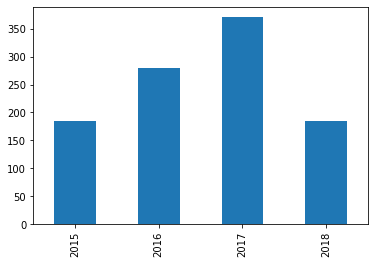

In [42]:
# 5. Wie hat sich die Anzahl der Schießereien in den letzten Jahren entwickelt?
shootings = crime[crime['SHOOTING'] == "Y"]
shootings.YEAR.value_counts().sort_index().plot.bar()

In [31]:
# 5.1 In welchem Bezirk finden die meisten Schießereien statt?
shootings.DISTRICT.mode()

0    B2
dtype: object

In [27]:
# 5.2 In welcher Straße finden die meisten Schießereien statt?
shootings.STREET.mode()

0    WASHINGTON ST
dtype: object

<AxesSubplot:>

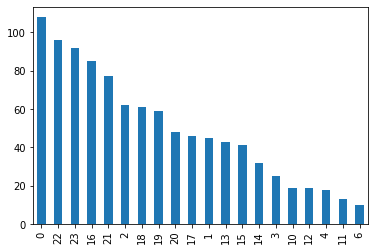

In [43]:
# 5.3 Zu welchen Uhrzeiten finden die meisten Schießereien statt?
shootings.HOUR.value_counts()[:20].plot.bar()